<a href="https://colab.research.google.com/github/Elhamyali/TOPC-learning-sessions/blob/main/2023_TOPC_Learning_Session_Poll_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This notebook analyzes Zoom poll responses from four **learning sessions** for Cohort 3 in The Opportunity Project for Cities (TOPC) program 2023:

*   Systems mapping (data not available)
*   Data governance
*   User testing
*   Impact evaluation
*   Product launch

Every poll included questions to measure four **educational learning objectives** of adult critical thinking:

*   Knowledge and comprehension
*   Application
*   Analysis
*   Evaluation *(We excluded this objective because it was only measured in one learning session)*

This analysis includes these outputs:

*   **Summary statistics** for every learning session and educational learning objectives.
*   **Box plots** to visually represent the distribution of responses and their spread, providing insights into the overall confidence levels in each learning sessions and educational objectives.



---



# Executive summary

**Skills and confidence**

Overall, participants rated their skills:

- **Very confident in analysis**; drawing connections among ideas (e.x. how user testing fits into iterating a prototype)
- **Moderately confident in knowledge and comprehension**; recognizing facts and understanding what they mean (e.x. Describe phases of user testing)
- **Moderately confident in application**; applying the facts, rules, concepts, and ideas (e.x. Model design sprint into a real-life city project)

**Learning session insights**

- **Impact Evaluation** seems to be the most well-received session, particularly in the "Application" category.
- **Data Governance** is strong overall but has some variation in the "Evaluation" category.
- **User Testing and Product Launch** seem to have areas that could be improved, particularly in "Knowledge and Comprehension" for User Testing and across all educational learning categories for Product Launch.

**Learning session background**

A total of 40 people participated across all four learning sessions with the below survey respondent count per session:

- Data governance: 18
- Impact evaluation: 7
- User testing: 11
- Product launch: 4

**Limitations**

In this analysis, the data for each learning session varies in sample size, ranging from 4 to 18 participants. It's crucial to note that the smaller sample sizes, especially for the "Impact Evaluation" and "User Testing" sessions, may influence the statistical power of our analyses.

The reduced sample size poses several challenges:

- Statistical Power: The smaller the sample size, the less power we have to detect significant effects or differences. This means that some of the observed effects may be due to chance.

- Generalizability: A smaller sample size limits our ability to generalize these findings to a broader population. The characteristics of this sample may not adequately represent the larger population of the TOPC cohort.

- Estimate Variability: The confidence intervals for our estimates are likely to be wider due to the smaller sample size, implying less certainty around our point estimates.



---



# Import necessary libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm



---



# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/Shareddrives/Beeck Center Shared Drive/2. Programs + Projects/1. Projects/TOPC - The Opportunity Project for Cities/Curriculum Development/Learning Sessions (Beeck Internal)/Metrics /2023 Analysis/Learning Session Poll Analysis - For Analysis (2).csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Session Name,Confidence level,Knowledge and comprehension,Application,Analysis,Evaluation
0,Data governance,Very confident,8.0,7.0,12.0,8.0
1,Data governance,Moderately confident,9.0,10.0,5.0,8.0
2,Data governance,Somewhat confident,1.0,0.0,0.0,1.0
3,Data governance,Not confident at all,0.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN




---



# Data dictionary



In [ ]:
confidence_weights = {
    'Very confident': 4,
    'Moderately confident': 3,
    'Somewhat confident': 2,
    'Not at all confident': 1,
    'Not confident at all': 1
}

print(df['Confidence level'].unique())

weighted_data = {}
summary_stats = {}

['Very confident' 'Moderately confident' 'Somewhat confident'
 'Not confident at all' nan]




---



# Summary statistics per educational learning objective

In [ ]:
weighted_data = {}
summary_stats = {}

for category in df.columns[2:]:
    weighted_data[category] = []
    for i, row in df.iterrows():
        if pd.isna(row[category]):
            continue
        weight = confidence_weights[row['Confidence level']]
        count = int(row[category])
        weighted_data[category].extend([weight] * count)

    summary_stats[category] = {
        'Mean': np.mean(weighted_data[category]),
        'Median': np.median(weighted_data[category]),
        'StdDev': np.std(weighted_data[category], ddof=1),
        'Q1': np.percentile(weighted_data[category], 25),
        'Q3': np.percentile(weighted_data[category], 75),
        'Min': np.min(weighted_data[category]),
        'Max': np.max(weighted_data[category])
    }

for key, stats in summary_stats.items():
    print(f"\n{key}:")
    for stat, value in stats.items():
        print(f"{stat}: {value:.2f}")



Knowledge and comprehension:
Mean: 3.08
Median: 3.00
StdDev: 0.73
Q1: 3.00
Q3: 4.00
Min: 2.00
Max: 4.00

Application:
Mean: 3.23
Median: 3.00
StdDev: 0.70
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00

Analysis:
Mean: 3.40
Median: 3.50
StdDev: 0.71
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00

Evaluation:
Mean: 3.28
Median: 3.00
StdDev: 0.83
Q1: 3.00
Q3: 4.00
Min: 1.00
Max: 4.00




---



# Box plots of confidence levels across educational learning objectives

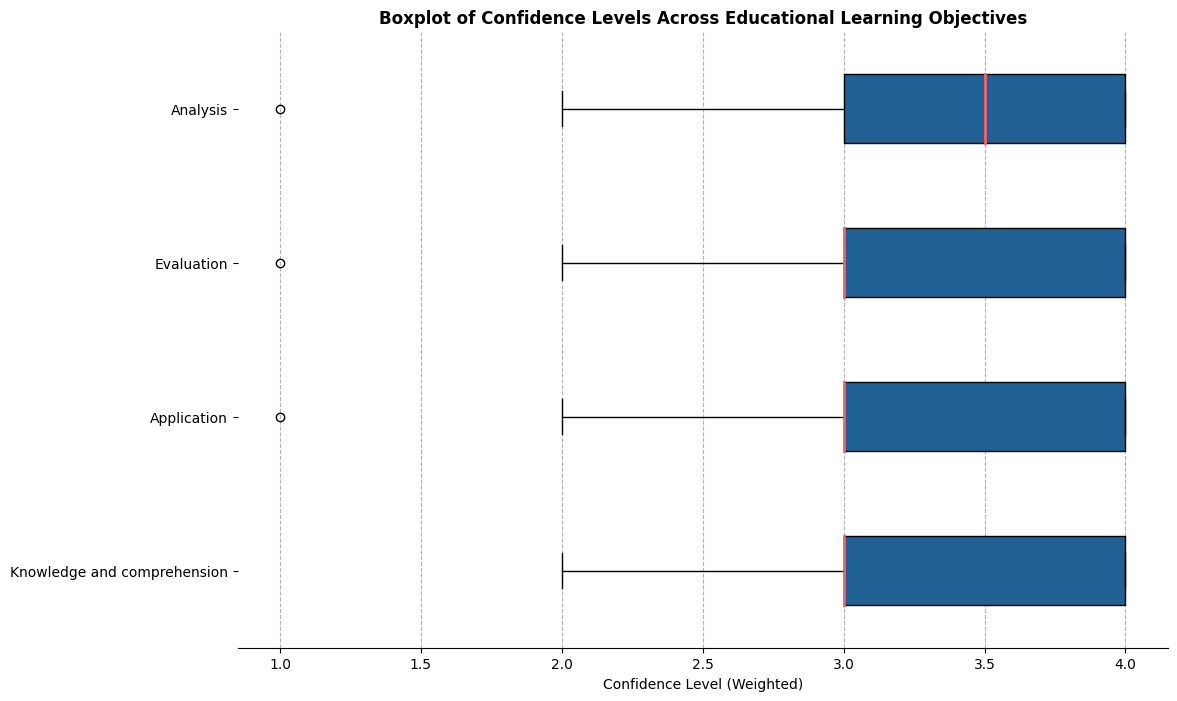

In [ ]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Open Sans'] + rcParams['font.sans-serif']

sorted_keys = sorted(weighted_data.keys(), key=lambda x: np.median(weighted_data[x]))
sorted_data = [weighted_data[key] for key in sorted_keys]

plt.figure(figsize=(12, 8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

bp = plt.boxplot(sorted_data, vert=False, patch_artist=True, labels=None)
ax.set_yticklabels(sorted_keys)

for patch, median in zip(bp['boxes'], bp['medians']):
    patch.set_facecolor('#206095')
    median.set(color='#F66068', linewidth=2)

plt.title('Boxplot of Confidence Levels Across Educational Learning Objectives', fontweight='bold')

ax.xaxis.grid(True, linestyle='--', which='major', color='#B3B3B3', alpha=1.0)
ax.yaxis.grid(False)

plt.xlabel('Confidence Level (Weighted)')
plt.show()



---



# Summary statistics per learning session

In [ ]:
session_weighted_data = {}
session_summary_stats = {}

for session in sessions_of_interest:
    df_session = df[df['Session Name'] == session]
    session_weighted_data[session] = {}
    session_summary_stats[session] = {}

    for category in df.columns[2:]:
        session_weighted_data[session][category] = []
        for i, row in df_session.iterrows():
            if pd.isna(row[category]):
                continue
            weight = confidence_weights[row['Confidence level']]
            count = int(row[category])
            session_weighted_data[session][category].extend([weight] * count)

        if len(session_weighted_data[session][category]) == 0:
            session_summary_stats[session][category] = 'No data available'
            continue

        session_summary_stats[session][category] = {
            'Mean': np.mean(session_weighted_data[session][category]),
            'Median': np.median(session_weighted_data[session][category]),
            'StdDev': np.std(session_weighted_data[session][category], ddof=1),
            'Q1': np.percentile(session_weighted_data[session][category], 25),
            'Q3': np.percentile(session_weighted_data[session][category], 75),
            'Min': np.min(session_weighted_data[session][category]),
            'Max': np.max(session_weighted_data[session][category])
        }

for session, session_stats in session_summary_stats.items():
    print(f"\nLearning Session: {session}")
    for key, stats in session_stats.items():
        print(f"  {key}:")
        if isinstance(stats, dict):  # Check if stats is a dictionary
            for stat, value in stats.items():
                if isinstance(value, (int, float)):
                    print(f"    {stat}: {value:.2f}")
                else:
                    print(f"    {stat}: {value}")
        else:  # If stats is not a dictionary (i.e., it's a string like 'No data available')
            print(f"    {stats}")


Learning Session: Data governance
  Knowledge and comprehension:
    Mean: 3.39
    Median: 3.00
    StdDev: 0.61
    Q1: 3.00
    Q3: 4.00
    Min: 2
    Max: 4
  Application:
    Mean: 3.28
    Median: 3.00
    StdDev: 0.75
    Q1: 3.00
    Q3: 4.00
    Min: 1
    Max: 4
  Analysis:
    Mean: 3.56
    Median: 4.00
    StdDev: 0.78
    Q1: 3.00
    Q3: 4.00
    Min: 1
    Max: 4
  Evaluation:
    Mean: 3.28
    Median: 3.00
    StdDev: 0.83
    Q1: 3.00
    Q3: 4.00
    Min: 1
    Max: 4

Learning Session: Impact evaluation
  Knowledge and comprehension:
    Mean: 3.29
    Median: 3.00
    StdDev: 0.76
    Q1: 3.00
    Q3: 4.00
    Min: 2
    Max: 4
  Application:
    Mean: 3.71
    Median: 4.00
    StdDev: 0.49
    Q1: 3.50
    Q3: 4.00
    Min: 3
    Max: 4
  Analysis:
    Mean: 3.14
    Median: 3.00
    StdDev: 0.69
    Q1: 3.00
    Q3: 3.50
    Min: 2
    Max: 4
  Evaluation:
    No data available

Learning Session: User testing
  Knowledge and comprehension:
    Mean: 2.55
    M



---



# Box plots of learning sessions

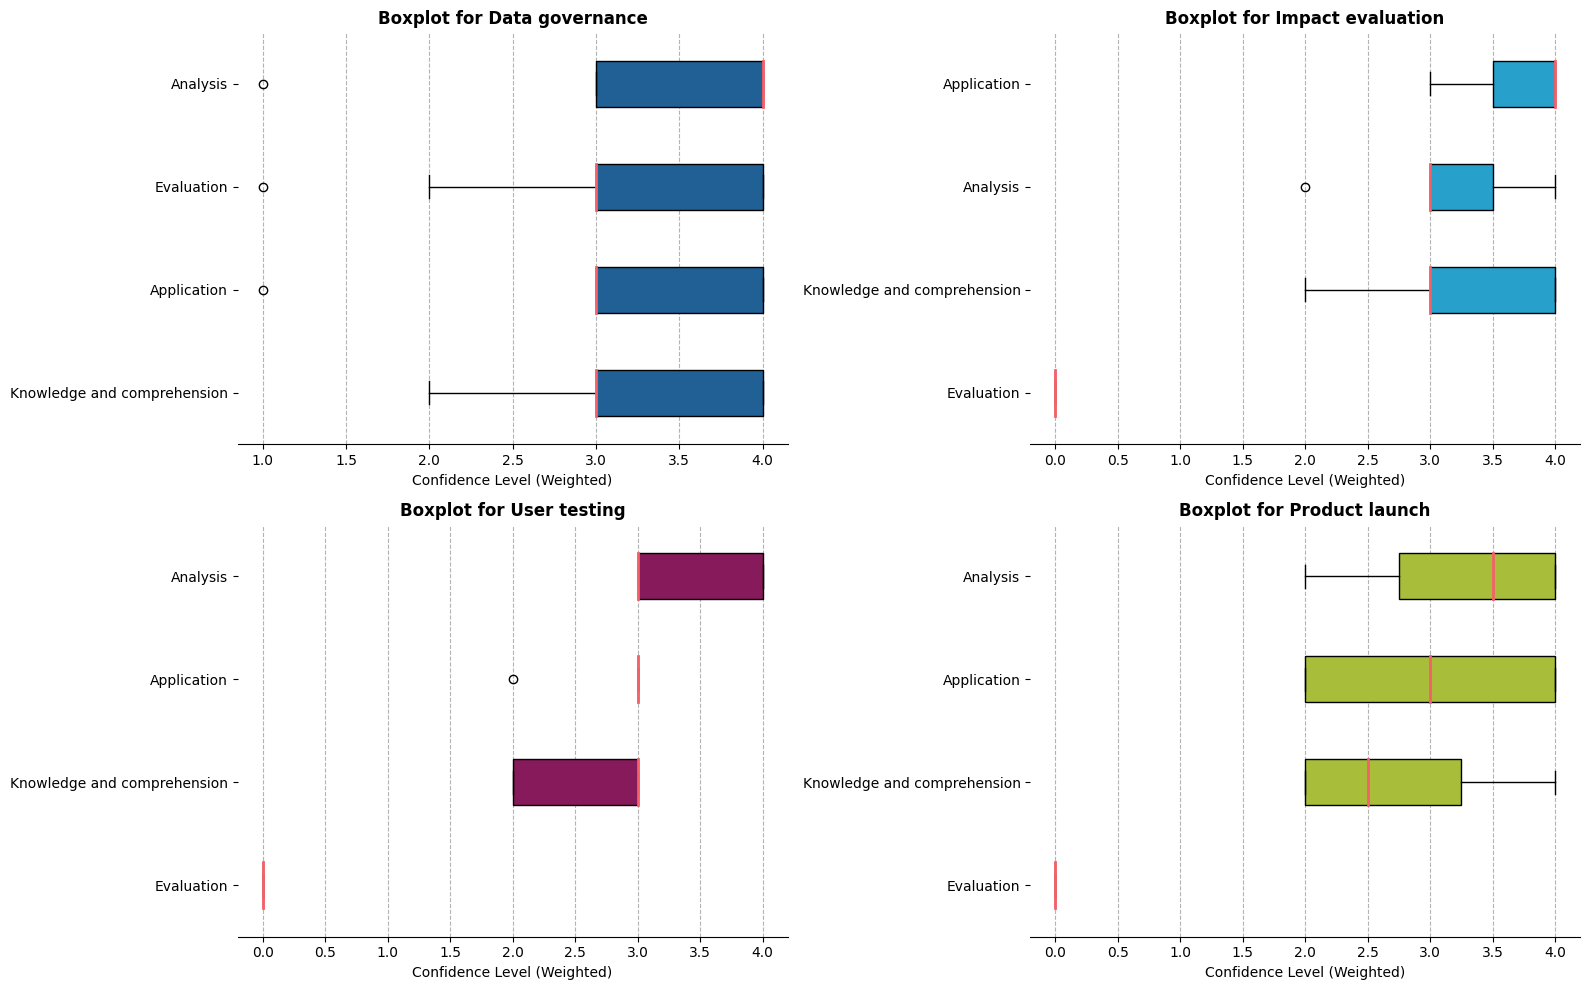

In [ ]:
sessions_of_interest = ['Data governance', 'Impact evaluation', 'User testing', 'Product launch']

colors = ['#206095', '#27A0CC', '#871A5B', '#A8BD3A']

plt.figure(figsize=(16, 10))

for i, session in enumerate(sessions_of_interest):
    non_empty_keys = [key for key in session_weighted_data[session].keys() if session_weighted_data[session][key]]
    sorted_keys = sorted(session_weighted_data[session].keys(), key=lambda x: np.median(session_weighted_data[session][x]) if session_weighted_data[session][x] else 0)
    sorted_data = [session_weighted_data[session][key] if session_weighted_data[session][key] else [0] for key in sorted_keys]

    plt.subplot(2, 2, i+1)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    bp = plt.boxplot(sorted_data, vert=False, patch_artist=True, labels=sorted_keys, boxprops=dict(facecolor=colors[i], edgecolor='black'), whiskerprops=dict(color='black'))

    for patch, median, whisker in zip(bp['boxes'], bp['medians'], bp['whiskers']):
        patch.set_facecolor(colors[i])
        patch.set_edgecolor('black')
        median.set(color='#F66068', linewidth=2)
        whisker.set(color='black')

    plt.title(f'Boxplot for {session}', fontweight='bold')
    ax.xaxis.grid(True, linestyle='--', which='major', color='#B3B3B3', alpha=1.0)
    ax.yaxis.grid(False)

    plt.xlabel('Confidence Level (Weighted)')

plt.tight_layout()
plt.show()
